### Module Importation

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import statistics
%matplotlib inline

### Load the ECG Image

#### Load the ECG

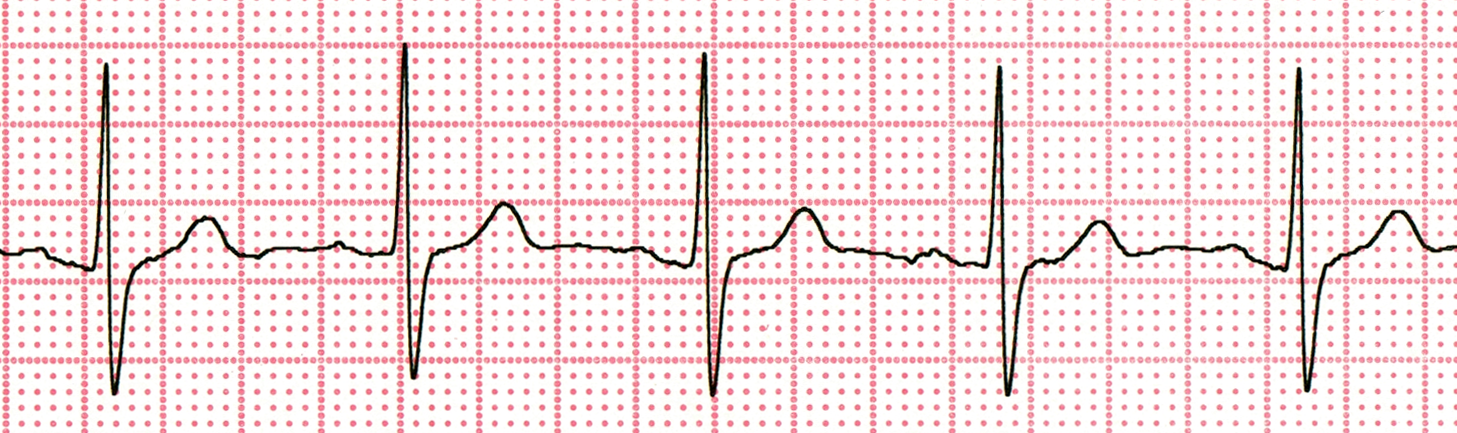

In [2]:
ecg = Image.open('ECG_Input/Lead_V5.bmp')
ecg

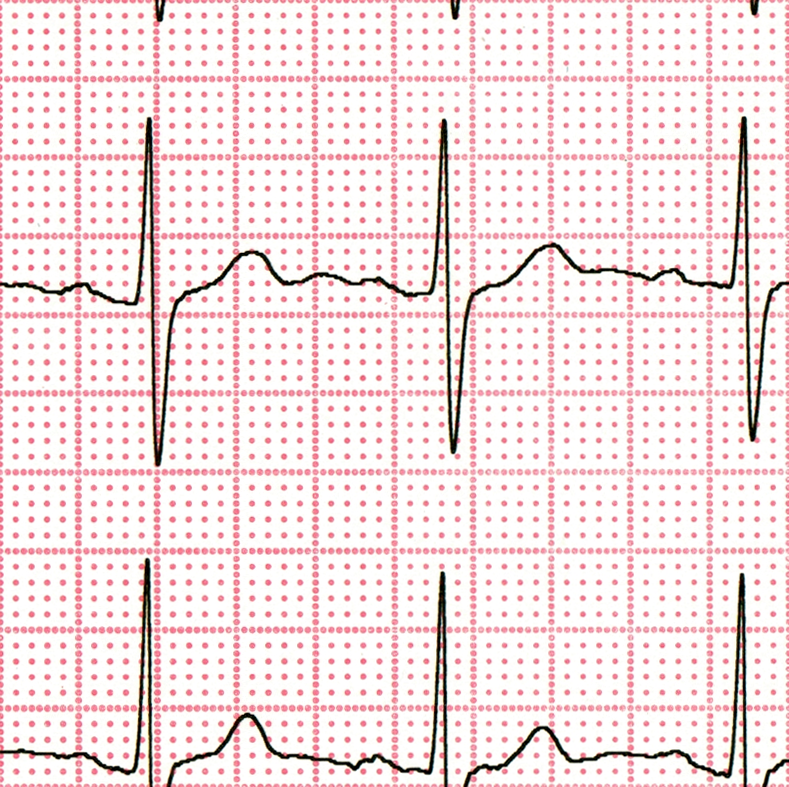

In [3]:
scale = Image.open('ECG_Input/Scale.bmp')
scale

### Calculate the Dimensions

In [4]:
x = ecg.size[0]
y = ecg.size[1]

print(x)
print(y)

1457
433


### Calculate the Scale

In [5]:
x_scale = scale.size[0]
y_scale = scale.size[1]

print(x_scale)
print(y_scale)

789
787


In [6]:
PixelPerSmallGrid = (x_scale + y_scale) * 0.5 / 50
print(PixelPerSmallGrid)

15.76


In [7]:
SmallGridPerPixel = 1 / PixelPerSmallGrid

In [8]:
timeUnit = []
for i in range(x):
    timeUnit.append(i * SmallGridPerPixel * 0.04)

### Extract All the Pixels

In [9]:
matrix = []
points = []

for i in range(x):
    matrix.append([])
    for j in range(y):
        matrix[i].append(ecg.getpixel((i,j)))       

### Extract Black Points

In [10]:
referenceLine_pos = y
gain = SmallGridPerPixel * 0.1
absMax = 0
V5_original = []
points_vertical = []
theOne = 0

for xAxis in range(x):
    for yAxis in range(y):
        currentPoint = matrix[xAxis][yAxis]
        # Pickup Blue points
        if currentPoint[0] < 100 and currentPoint[1] < 100 and currentPoint[2] < 100:
            points_vertical.append(yAxis)
   
    
    # Choose the largest amplitude
    for item in points_vertical:
        
        if math.fabs(item-referenceLine_pos) > absMax:
            absMax = math.fabs(item-referenceLine_pos)
            theOne = item 
    V5_original.append((200-theOne)*gain)
    
    absMax = 0  
    theOne = 0
    points_vertical = []

In [11]:
V5 = []
zeroPotential = statistics.median(V5_original)
for item in V5_original:
    V5.append(item-zeroPotential)

In [12]:
V5

[-0.0063451776649746106,
 -0.012690355329949221,
 -0.01903553299492383,
 -0.01903553299492383,
 -0.01903553299492383,
 -0.025380710659898442,
 -0.03172588832487305,
 -0.03172588832487305,
 -0.03172588832487305,
 -0.03172588832487305,
 -0.03172588832487305,
 -0.03172588832487305,
 -0.03172588832487305,
 -0.03172588832487305,
 -0.03172588832487305,
 -0.03172588832487305,
 -0.03172588832487305,
 -0.03172588832487305,
 -0.025380710659898442,
 -0.025380710659898442,
 -0.01903553299492383,
 -0.01903553299492383,
 -0.012690355329949221,
 -0.0063451776649746106,
 -0.0063451776649746106,
 -0.0063451776649746106,
 -0.0063451776649746106,
 -0.0063451776649746106,
 -0.0063451776649746106,
 -0.0063451776649746106,
 -0.0063451776649746106,
 -0.0063451776649746106,
 -0.0063451776649746106,
 -0.0063451776649746106,
 -0.0063451776649746106,
 0.0,
 0.006345177664974666,
 0.006345177664974666,
 0.006345177664974666,
 0.006345177664974666,
 0.006345177664974666,
 0.006345177664974666,
 0.00634517766497466

In [13]:
matrix[0][0]

(252, 252, 246)

In [14]:
len(V5)

1457

### Construct Numpy Array and File

In [15]:
V5_array = np.array([timeUnit, V5])

In [16]:
np.save('ECG_Output/V5_array', V5_array)

In [17]:
V5_load = np.load('ECG_Output/V5_array.npy')

In [18]:
V5_load.shape

(2, 1457)

### Output the ECG data globally

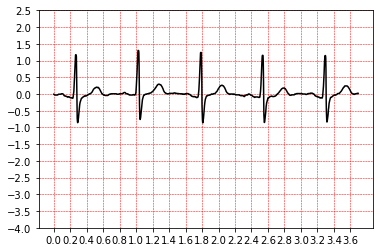

In [19]:
fig = plt.figure()
s = fig.add_subplot(111)

s.plot(timeUnit, V5, linewidth=1.5, color='black')

s.set_xticks(np.arange(0, timeUnit[-1], 0.2))
s.set_yticks(np.arange(-4, 3, 0.5))
plt.grid(True, color='r', linestyle='--', linewidth=0.5)

In [20]:
fig.savefig('ECG_Output/ECG_V5_output.png', dpi=400)

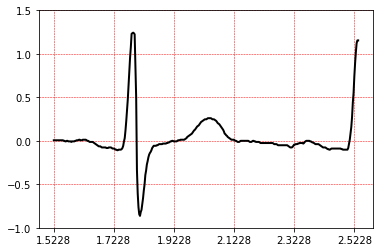

In [21]:
start = 600
end = 1000
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(timeUnit[start:end], V5[start:end], linewidth=2, color='black')

s.set_xticks(np.arange(timeUnit[start], timeUnit[end], 0.2))
s.set_yticks(np.arange(-1, 2, 0.5))
plt.grid(True, color='r', linestyle='--', linewidth=0.5)